In [2]:
import numpy as np
import cfpack as cfp
from scipy.stats import linregress

In [3]:
peaks = np.array([0.5])*[27,45,54,66,73,83,89] # Theta values
angs = np.sin(peaks*np.pi/180) # Associated sin values
l = 1.54e-10 # Lambda value
hkl_square = [3,8,11,16,19,24,27] # h^2+k^2+l^2 values that are allowed
angs_square = angs**2 # Squaring them
slope, intercept, r, p, se = linregress(hkl_square, angs_square) # Linear regression on hkl_square and angles squared

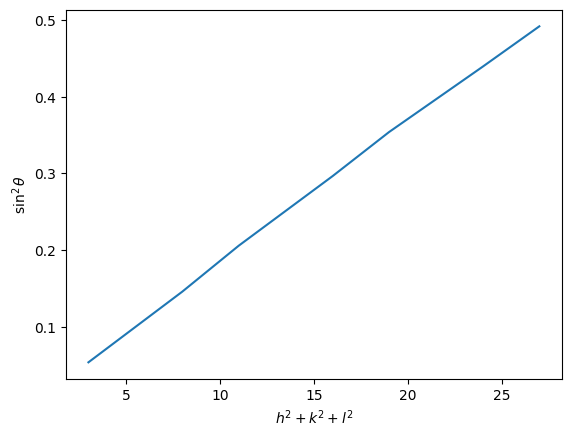

cfpack.show_or_save_plot.<locals>.ret

In [4]:
cfp.plot(x=hkl_square,y=angs_square,xlabel=r"$h^2+k^2+l^2$",ylabel = r"$\sin^2\theta$",show=True) # Plot to confirm its linear

In [5]:
# Define simple model to calculate interpolation
def model(x): 
    y = slope*x +intercept
    return y

In [6]:
forbidden = np.array([model(4), model(12), model(20)]) # Forbidden h^2+k^2+l^2 values
np.sqrt(forbidden)*(2*180/np.pi) # Take sqrt of model values, as those are sin^2 and then convert to angle as 2*theta
a = l/(2*angs)*np.sqrt(hkl_square) # Calculating 'a' based on formula I give in assignment. Eq. (3)
np.mean(a)

np.float64(5.675473223775815e-10)

In [7]:
np.arcsin(np.sqrt(forbidden))*(2*180/np.pi) # Angles that forbidden peaks occur at.

array([31.89822881, 56.14250063, 74.61697213])